In [124]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

# Educational Yearwise Defaulter

In [125]:
def educationyearwise_branch_data(student_df,branch_name, year_no ):
    ''' NaN to Zero '''
    student_df = student_df.fillna(0)


    ''' Filtering Data on basis of Branch and Edu_Year'''

    # selecting rows based on condition
    year_df = student_df.loc[(student_df['Year'] == int(year_no)) & student_df['Branch']]
    year_df = year_df.loc[:, (year_df != 0).any(axis=0)]
    year_df = year_df.loc[(year_df['Branch'] == branch_name)]    
    return  year_df

student_df = pd.read_csv('E:/FYND/Final Project/Data Creation/student.csv')  

year_no = int(input("Enter year of Student :"))
branch_name = 'EXTC'

if year_no == 1:
    year_df  = educationyearwise_branch_data(student_df,branch_name, year_no )
    year_df = year_df.groupby(['Name','Enrolled_ID','Year']).agg(M1= ('M1','sum'),CP= ('CP','sum'),
                                                          BEE= ('BEE','sum'),Lec_Attended_Percentage= ('Lec_Attended(%)','mean')).reset_index()

elif year_no == 2:
    year_df  = educationyearwise_branch_data(student_df,branch_name, year_no )
    year_df = year_df.groupby(['Name','Enrolled_ID','Year']).agg(VSLI= ('VSLI','sum'),EV= ('EV','sum'),
                                                          Robotics= ('Robotics','sum'),Lec_Attended_Percentage= ('Lec_Attended_Percentage','mean')).reset_index()

elif year_no == 3:
    year_df  = educationyearwise_branch_data(student_df,branch_name, year_no )
    year_df = year_df.groupby(['Name','Enrolled_ID','Year']).agg(SAP= ('SAP','sum'),MBS= ('MBS','sum'),PLE= ('PLE','sum'),
                                                          Lec_Attended_Percentage= ('Lec_Attended_Percentage','mean')).reset_index()
    
elif year_no == 4:
    year_df  = educationyearwise_branch_data(student_df,branch_name, year_no )
    year_df = year_df.groupby(['Name','Enrolled_ID','Year']).agg(ELE= ('ELE','sum'),FYP= ('FYP','sum'),MME= ('MME','sum'),
                                                          Lec_Attended_Percentage= ('Lec_Attended_Percentage','mean')).reset_index()
else: 
    print("Invalid Input")

print(f"Branch is {branch_name}")
# print(year_df.head())
        
    





Enter year of Student :1
Branch is EXTC


In [120]:
# ploting a bar chat for defaulter list on percentage basis & Edu_year

defaulter_df = year_df[(year_df['Lec_Attended_Percentage'] < 50) &  (year_df['Year'] == 1)] 
defaulter_df.plot(x='Name', y=['Lec_Attended_Percentage'], kind='bar',figsize=(10,8),width =0.25) 

plt.yticks(np.arange(0, 110, 10))
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.title("Overall Analysis of EXTC for 1st year students ")
plt.legend(loc ="upper left")
plt.savefig('FY.png', dpi=300, bbox_inches='tight')
plt.show()


# Monthly Defaulter

In [127]:
def monthwise_branch_data(student_df,branch_name, month_no ):
    ''' NaN to Zero '''
    student_df = student_df.fillna(0)
#     print(student_df.head())
    
    student_df['Month'] = pd.DatetimeIndex(student_df['Date']).month      # converting date to month

    ''' Filtering Data'''

    # selecting rows based on condition
    month_df = student_df.loc[(student_df['Month'] == int(month_no)) & student_df['Branch']]
    month_df = month_df.loc[:, (month_df != 0).any(axis=0)]
    month_df = month_df.loc[(month_df['Branch'] == branch_name)]    
    return  month_df

student_df = pd.read_csv('E:/FYND/Final Project/Data Creation/student.csv')

month_no = int(input("Enter month_no.(2 to 6) :"))
branch_name = str(input("Enter Branch Name(IT or MECH) :"))

if branch_name == "IT":
    month_df  =   monthwise_branch_data(student_df,branch_name, month_no)  
    month_df = month_df.groupby(['Name','Enrolled_ID','Year','Month']).agg(M1= ('M1','sum'), CP= ('CP','sum'), 
                                                BEE= ('BEE','sum'), M3= ('M3','sum'), 
                                                Logic_Design= ('Logic_Design','sum'),DMS= ('DMS','sum'),
                                                DS= ('DS','sum'), DBA= ('DBA','sum'), OS= ('OS','sum'), 
                                                OOPs= ('OOPs','sum'), M4= ('M4','sum'), LMS= ('LMS','sum'), 
                                                Lec_Attended_Percentage= ('Lec_Attended_Percentage','mean')).reset_index()
elif branch_name == "MECH":
    month_df  =   monthwise_branch_data(student_df,branch_name, month_no)  
    month_df = month_df.groupby(['Name','Enrolled_ID','Month','Year','M1']).agg( CP= ('CP','sum'),
                                                           BEE= ('BEE','sum'), M3= ('M3','sum'),
                                                           SOM= ('SOM','sum'), THERMO= ('THERMO','sum'),
                                                           HT= ('HT','sum'), DESIGN= ('DESIGN','sum'),
                                                           MANU= ('MANU','sum'), MD= ('MD','sum'),
                                                           IE= ('IE','sum'), PPE= ('PPE','sum'),
                                                           Lec_Attended_Percentage= ('Lec_Attended_Percentage','mean')).reset_index()


# print(month_df.head())



Enter month_no.(2 to 6) :5
Enter Branch Name(IT or MECH) :MECH


In [121]:
# ploting a bar chat for defaulter list on percentage basis & Monthly

defaulter_df = month_df[(month_df['Lec_Attended_Percentage'] < 45) &  (month_df['Year'] == 4)] 
defaulter_df.plot(x='Name', y=['Lec_Attended_Percentage'], kind='bar',figsize=(10,8),width =0.25) 

plt.yticks(np.arange(0, 110, 10))
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.title("Overall Analysis of IT for 3rd month of 4th year")
plt.legend(loc ="upper left")
plt.savefig('TMFoY.png', dpi=300, bbox_inches='tight')
plt.show()

# Weekly Defaulter

In [128]:
def weekwise_branch_data(student_df,branch_name, week_no ):
    ''' NaN to Zero '''
    student_df = student_df.fillna(0)
    
    student_df['Date'] = pd.to_datetime(student_df['Date'], errors='coerce')
    student_df['Week_Number'] = (student_df['Date']).dt.isocalendar().week       # converting date to week

    ''' Filtering Data'''


    # selecting rows based on condition
    week_df = student_df.loc[(student_df['Week_Number'] == int(week_no)) & student_df['Branch']]
    week_df = week_df.loc[:, (week_df != 0).any(axis=0)]
    week_df = week_df.loc[(week_df['Branch'] == branch_name)]    
    return  week_df

student_df = pd.read_csv('E:/FYND/Final Project/Data Creation/student.csv')

week_no = int(input("Enter week_no.(5 to 22) :"))
branch_name = str(input("Enter Branch Name(COMPS or MECH ) :"))

if branch_name == "COMPS":
    week_df  =   weekwise_branch_data(student_df,branch_name, week_no )
    week_df = (week_df.groupby(['Name','Enrolled_ID','Year','Week_Number']).agg(M1= ('M1','sum'), CP= ('CP','sum'), 
                                                BEE= ('BEE','sum'), M3= ('M3','sum'), 
                                                DBR= ('DBR','sum'),DSA= ('DSA','sum'),
                                                WEB= ('WEB','sum'), DMS= ('DMS','sum'), OOPs= ('OOPs','sum'), 
                                                LLE= ('LLE','sum'), DIGITAL= ('DIGITAL','sum'),
                                                Lec_Attended_Percentage= ('Lec_Attended_Percentage','mean'))).reset_index()
elif branch_name == "MECH":
    week_df  =   weekwise_branch_data(student_df,branch_name, week_no )
    week_df= (week_df.groupby(['Name','Enrolled_ID','Week_Number','Year']).agg(M1= ('M1','sum'), CP= ('CP','sum'),
                                                           BEE= ('BEE','sum'), M3= ('M3','sum'),
                                                           SOM= ('SOM','sum'), THERMO= ('THERMO','sum'),
                                                           HT= ('HT','sum'), DESIGN= ('DESIGN','sum'),
                                                           MANU= ('MANU','sum'), MD= ('MD','sum'),
                                                           IE= ('IE','sum'), PPE= ('PPE','sum'),
                                                           Lec_Attended_Percentage= ('Lec_Attended_Percentage','mean'))).reset_index()




# print(week_df.head())


Enter week_no.(5 to 22) :5
Enter Branch Name(COMPS or MECH ) :COMPS


In [122]:
# ploting a bar chat for defaulter list on percentage basis & Weekly

defaulter_df = week_df[(week_df['Lec_Attended_Percentage'] < 45) &  (week_df['Year'] == 2)] 
# print(defaulter_df.head())
defaulter_df.plot(x='Name', y=['Lec_Attended_Percentage'], kind='bar',figsize=(10,8),width =0.25) 

plt.yticks(np.arange(0, 110, 10))
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.title("Weekly analysis of COMPS for week1 of 2nd year ")
plt.legend(loc ="upper left")
plt.savefig('W1SY.png', dpi=300, bbox_inches='tight')
plt.show()


# Subjectwise Monthly Defaulter

In [129]:
student_df['Month'] = pd.DatetimeIndex(student_df['Date']).month                # converting date to month

defaulter_df = student_df[(student_df['Year'] == 2) &  (student_df['Branch'] == 'MECH')]
defaulter_df = defaulter_df.loc[:, (defaulter_df != 0).any(axis=0)]

sub_df= defaulter_df.groupby(['Name', 'Month'])[["M3","SOM","THERMO","Total no.of Lec"]].sum().reset_index()
sub_df['M3'] = round((sub_df['M3']/sub_df['Total no.of Lec']).multiply(300))
sub_df['SOM'] = round((sub_df['SOM']/sub_df['Total no.of Lec']).multiply(300))
sub_df['THERMO'] = round((sub_df['THERMO']/sub_df['Total no.of Lec']).multiply(300))
# print(sub_df.head())

              Name  Month     M3   SOM  THERMO  Total no.of Lec
0  Adrienne Porath      2   65.0  50.0    45.0               60
1  Adrienne Porath      3   39.0  43.0    43.0               69
2  Adrienne Porath      4   59.0  45.0    55.0               66
3  Adrienne Porath      5   57.0  57.0    62.0               63
4  Adrienne Porath      6  100.0  50.0   100.0                6


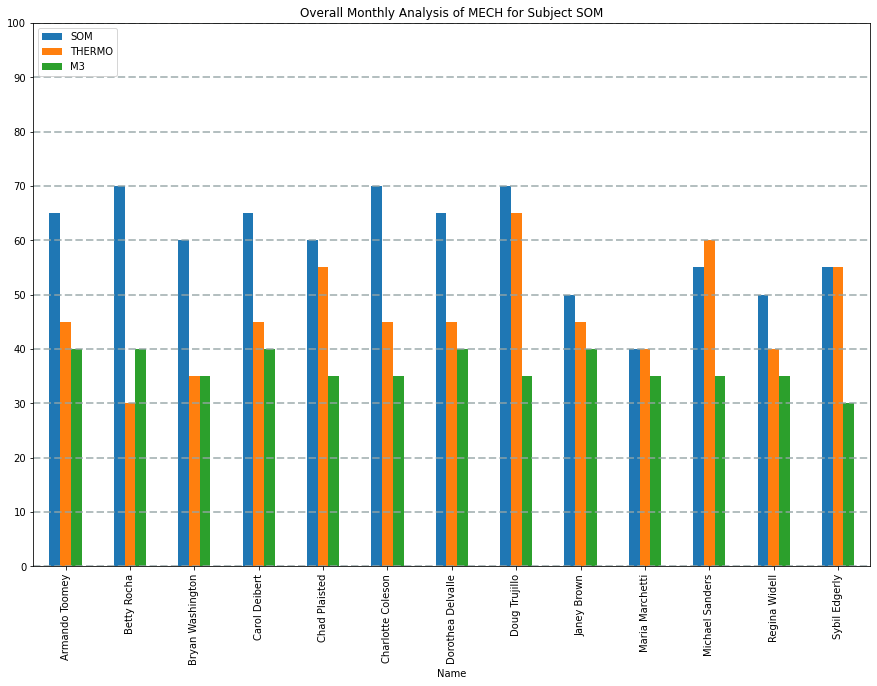

In [130]:
# ploting a bar chat for defaulter list on percentage basis & Subjectwise 

defaulter_df = sub_df[(sub_df['M3'] < 45) &  (sub_df['Month'] == 2)] 
defaulter_df.plot(x='Name', y=['SOM','THERMO','M3'], kind='bar',figsize=(15,10),width =0.5) 

plt.yticks(np.arange(0, 110, 10))
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.title("Overall Monthly Analysis of MECH for Subject SOM")
plt.legend(loc ="upper left")
plt.savefig('M31.png', dpi=300, bbox_inches='tight')
plt.show()